In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ajiteshshree/Spaceship-Titanic/main/spaceship-titanic/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/ajiteshshree/Spaceship-Titanic/main/spaceship-titanic/test.csv")

In [3]:
Cols = df.columns.tolist()
for x in Cols:
    print(x,end=' : ')
    print(df[x].unique())

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet : ['Europa' 'Earth' 'Mars' nan]
CryoSleep : [False True nan]
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age : [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP : [False True nan]
RoomService : [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt : [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall : [   0.   25.  371. ... 1085.  510. 1872.]
Spa : [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck : [   0.   44.   49. ... 1164.  971. 3235.]
Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hont

In [7]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

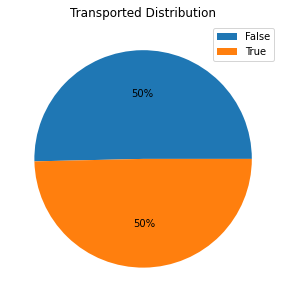

In [5]:
plt.subplots(figsize=(20, 5))
plt.pie(df["Transported"].value_counts(),autopct='%1.0f%%')
plt.title('Transported Distribution')
plt.legend(['False', 'True'], loc='best')
plt.show()

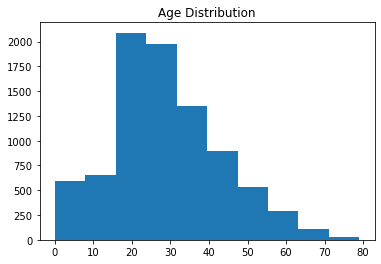

In [8]:
plt.hist(df['Age'])
plt.title("Age Distribution")
plt.show()

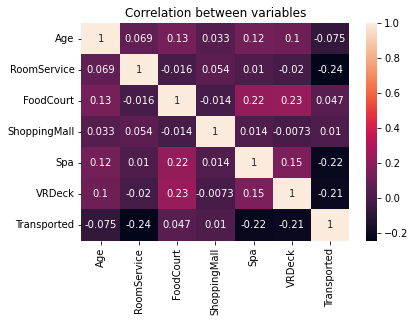

In [9]:
sns.heatmap(df.corr(method='pearson', min_periods=1), annot=True)
plt.title("Correlation between variables")
plt.show()

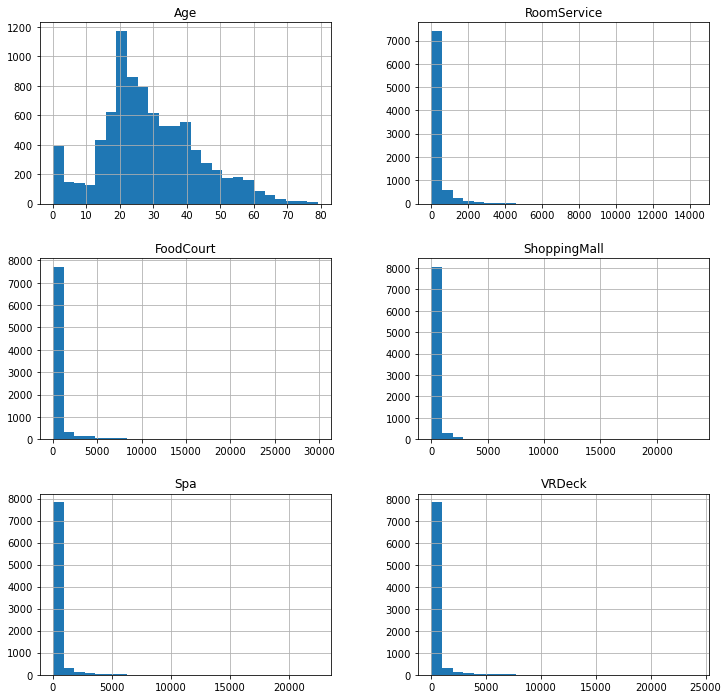

In [10]:
df.hist(bins = 25, figsize = (12, 12))
plt.show()

In [ ]:
plt.subplots(figsize=(20, 5))
plt.pie(df["VIP"].value_counts())
plt.title('VIP Service')
plt.legend(['False', 'True'], loc='best')
plt.show()

In [ ]:
plt.subplots(figsize=(20, 5))
plt.pie(df["CryoSleep"].value_counts())
plt.title('In CryoSleep')
plt.legend(['False', 'True'], loc='best')
plt.show()

In [11]:
test_pid = df_test['PassengerId'].tolist()
def slice_ids(df):
    pid = df['PassengerId'].tolist()
    df['PassengerId'] = [int(x[0:4]) for x in pid]
    df['PersonNo'] = [int(x[5:]) for x in pid]
    return df

In [12]:
df = slice_ids(df)
df_test = slice_ids(df_test)

In [13]:
df.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [14]:
print("df.shape : ", df.shape)
print("df_test.shape : ", df_test.shape)

df.shape :  (8693, 14)
df_test.shape :  (4277, 13)


In [15]:
#filling NaN values
def preprocess(df):
    li = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck', 'Age']
    for col in li:
        df[col].fillna(df[col].mean(),inplace=True)
    df["HomePlanet"].fillna(df["HomePlanet"].mode()[0],inplace=True)
    df["CryoSleep"].fillna(df["CryoSleep"].mode()[0],inplace=True)
    df["Destination"].fillna(df["Destination"].mode()[0],inplace=True)
    df["VIP"].fillna(df["VIP"].mode()[0],inplace=True)
    df["Cabin"].fillna("",inplace=True)

In [16]:
preprocess(df)
preprocess(df_test)

In [17]:
y = df['Transported']
df.drop(['Transported'], axis=1, inplace=True)

In [18]:
print([x for x in list(df.isnull().sum()) if x != 0], end=",")
print([x for x in list(df_test.isnull().sum()) if x != 0])

[],[]


In [19]:
def slice_cabin(df):
    b=0
    cabin_deck =[]
    cabin_side = []
    while b < df.shape[0]:
        if df.iloc[b,3] != "":
            cabin_deck.append(df.iloc[b,3][0])
            cabin_side.append(df.iloc[b,3][-1])
        else:
            cabin_deck.append("")
            cabin_side.append("")
        b += 1
    df['cabin_deck'] = cabin_deck
    df['cabin_side'] = cabin_side
    df.drop('Cabin', axis=1, inplace=True)

In [20]:
slice_cabin(df)
slice_cabin(df_test)

In [ ]:
df_test.head()

In [ ]:
# cols = df.columns
# cols2 = df_test.columns
# for x in cols:
#         print(x,end = ' : ')
#         print(df[x].unique())
# print()
# for t in cols2:
#     print(t,end = ' : ')
#     print(df_test[t].unique())       

In [21]:
non_int_cols = [k for k, v in dict(df.dtypes).items() if v == 'O' or v == 'bool']

In [22]:
non_int_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'cabin_deck', 'cabin_side']

In [23]:
def encode(df):
#     le = LabelEncoder()    
#     for x in non_int_cols:
#         df[x] = le.fit_transform(df[x])
    df = pd.get_dummies(df, columns=non_int_cols)
    return df

In [24]:
df = encode(df)
df_test = encode(df_test)

In [30]:
df.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PersonNo,HomePlanet_Earth,HomePlanet_Europa,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_,cabin_side_P,cabin_side_S
0,1,39.0,0.0,0.0,0.0,0.0,0.0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
1,2,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,33.0,0.0,1283.0,371.0,3329.0,193.0,2,0,1,...,0,0,0,0,0,0,0,0,0,1
4,4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,...,0,0,0,0,1,0,0,0,0,1


In [40]:
df_test.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PersonNo,HomePlanet_Earth,HomePlanet_Europa,...,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_P,cabin_side_S
0,13,27.0,0.0,0.0,0.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
1,18,19.0,0.0,9.0,0.0,2823.0,0.0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,19,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,21,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,23,20.0,10.0,0.0,635.0,0.0,0.0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [41]:
df.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'PersonNo', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'cabin_deck_A',
       'cabin_deck_B', 'cabin_deck_C', 'cabin_deck_D', 'cabin_deck_E',
       'cabin_deck_F', 'cabin_deck_G', 'cabin_deck_T', 'cabin_side_P',
       'cabin_side_S'],
      dtype='object')

In [35]:
df.drop(['cabin_deck_','cabin_side_'],axis=1,inplace=True)

KeyError: "['cabin_deck_', 'cabin_side_'] not found in axis"

In [36]:
df_test.drop(['cabin_deck_','cabin_side_'],axis=1,inplace=True)

In [37]:
df.shape

(8693, 28)

In [38]:
df_test.shape

(4277, 28)

In [ ]:
# df, df_test = df.align(df_test, join='left', axis=1, fill_value=0)

In [39]:
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(df,y)
print(logisticRegr.score(df, y))

0.7887955826527091


In [42]:
res = logisticRegr.predict(df_test).tolist()

In [43]:
predictions = pd.DataFrame({'PassengerId' : test_pid,'Transported':res})

In [44]:
predictions.set_index('PassengerId')

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [45]:
predictions.to_csv('predictions.csv',index = False)